In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
cutles =pd.read_csv("/content/Cutlets.csv")
cutles.head(10)


,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [ ]:
cutles.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [ ]:
cutles.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [ ]:
cutles[cutles.duplicated()].shape

(0, 2)

In [ ]:
cutles[cutles.duplicated()]

,Unit A,Unit B


In [ ]:
cutles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


<ipython-input-24-28d4900b68f3>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


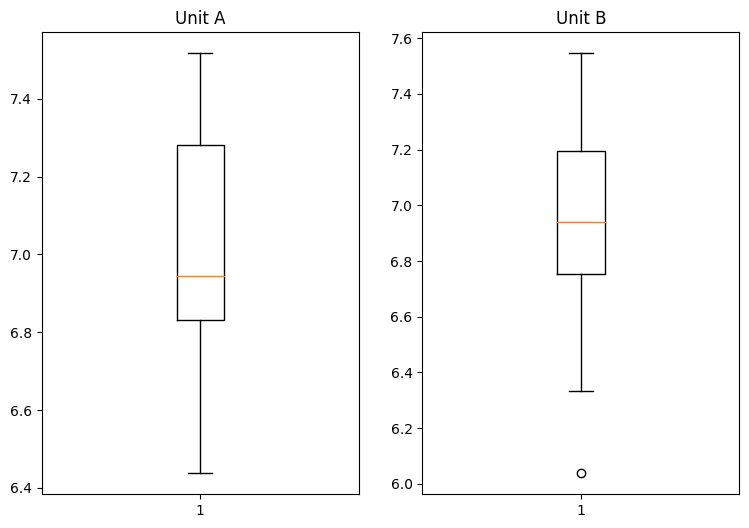

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(cutles['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(cutles['Unit B'])
plt.title('Unit B')
plt.show()

<ipython-input-27-8d1ac9b1f591>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


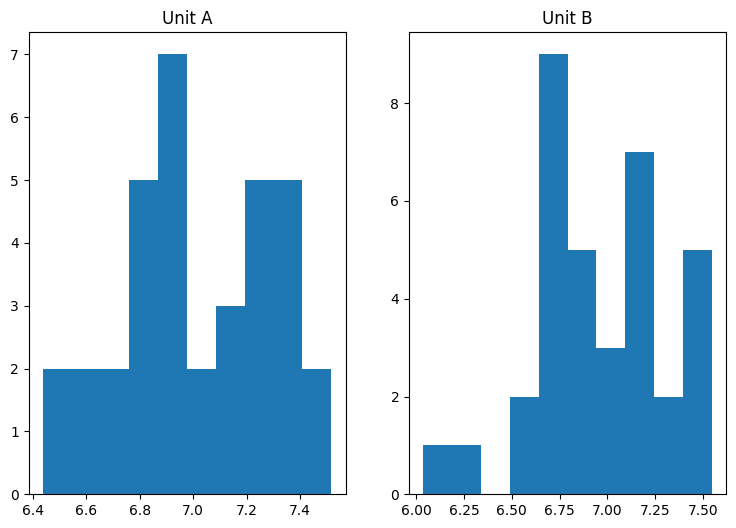

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.hist(cutles['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.hist(cutles['Unit B'])
plt.title('Unit B')
plt.show()

<ipython-input-30-9c7538d5c940>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cutles['Unit A'], kde = True)
<ipython-input-30-9c7538d5c940>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cutles['Unit B'],hist = True)


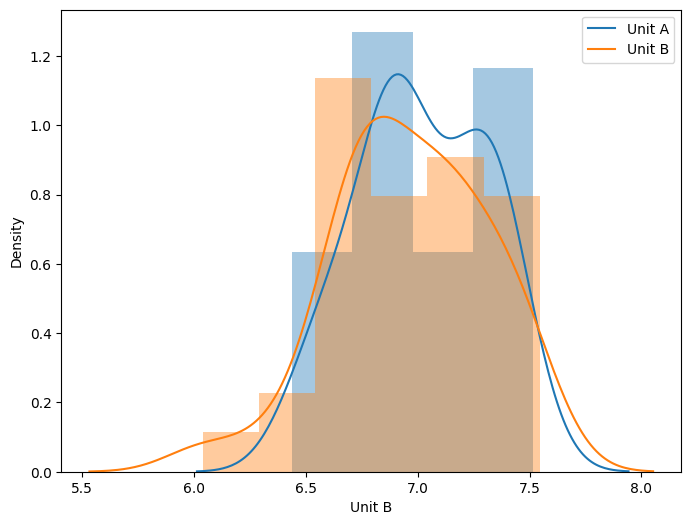

In [ ]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(cutles['Unit A'], kde = True)
sns.distplot(cutles['Unit B'],hist = True)
plt.legend(labels)

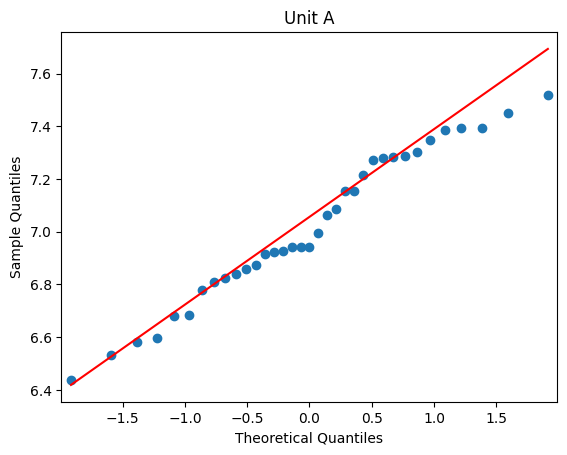

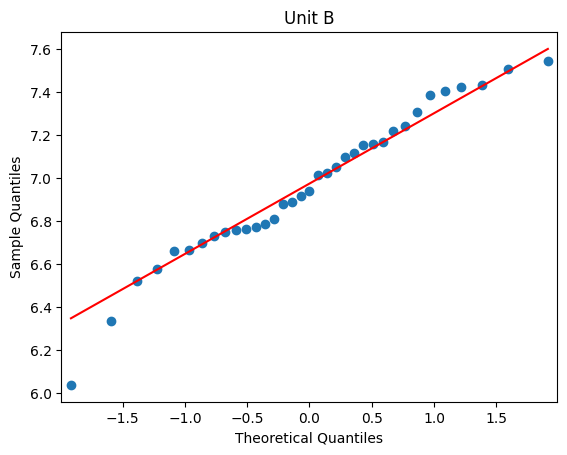

In [ ]:
# To check Normal Distributed or Not

sm.qqplot(cutles['Unit A'],line='q')
plt.title('Unit A')
sm.qqplot(cutles['Unit B'],line='q')
plt.title('Unit B')
plt.show()

In [ ]:
# Compare Evidences with Hypothesis using t-statistics
statistic, p_value=stats.ttest_ind(cutles['Unit A'],cutles['Unit B'],alternative='two-sided')
p_value


0.4722394724599501

In [ ]:
# If p_value is  ≠  ' α  ' we failed to reject Null Hypothesis because of lack of evidence
# If p_value is = ' α  ' we reject Null Hypothesis

alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


Hence, We fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples

⚫ **QUES 2**


In [47]:
# We are going to conduct a ANOVA Test on 4 Independent samples with Numerical Data

# Null Hypothesis:  μ1=μ2  =  μ3  =  μ4
# Alternative Hypthosis: Atleast One of them is Different


In [6]:
labtat=pd.read_csv("/content/LabTAT.csv")

In [7]:
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [8]:
labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [9]:
labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [10]:
labtat.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Length: 120, dtype: bool

In [11]:
labtat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


<ipython-input-16-2f706d8aa334>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


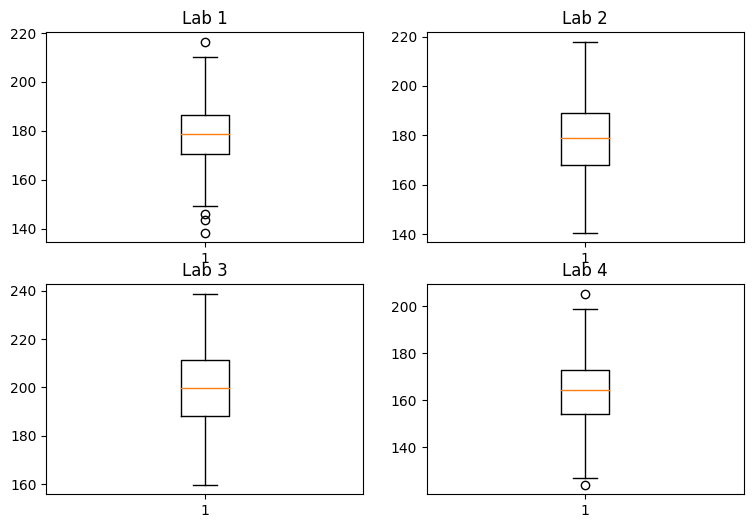

In [16]:
plt.subplots(figsize=(9,6))
plt.subplot(221)
plt.boxplot(labtat['Laboratory 1'])
plt.title('Lab 1')

plt.subplot(222)
plt.boxplot(labtat['Laboratory 2'])
plt.title('Lab 2')

plt.subplot(223)
plt.boxplot(labtat['Laboratory 3'])
plt.title('Lab 3')

plt.subplot(224)
plt.boxplot(labtat['Laboratory 4'])
plt.title('Lab 4')
plt.show()

<ipython-input-17-26653d6512e4>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


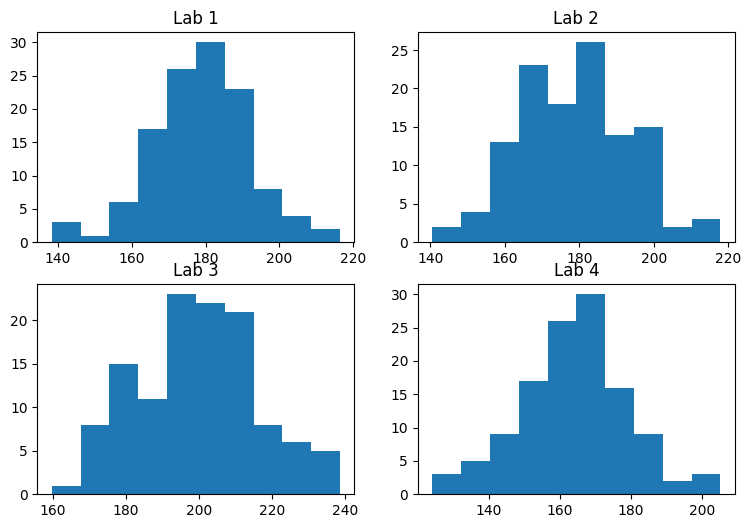

In [17]:
plt.subplots(figsize=(9,6))
plt.subplot(221)
plt.hist(labtat['Laboratory 1'])
plt.title('Lab 1')

plt.subplot(222)
plt.hist(labtat['Laboratory 2'])
plt.title('Lab 2')

plt.subplot(223)
plt.hist(labtat['Laboratory 3'])
plt.title('Lab 3')

plt.subplot(224)
plt.hist(labtat['Laboratory 4'])
plt.title('Lab 4')
plt.show()

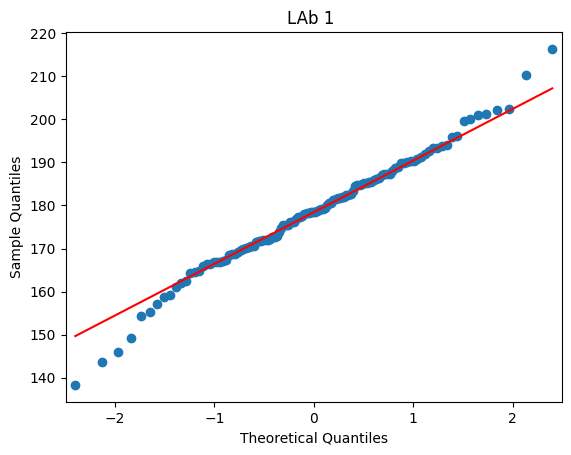

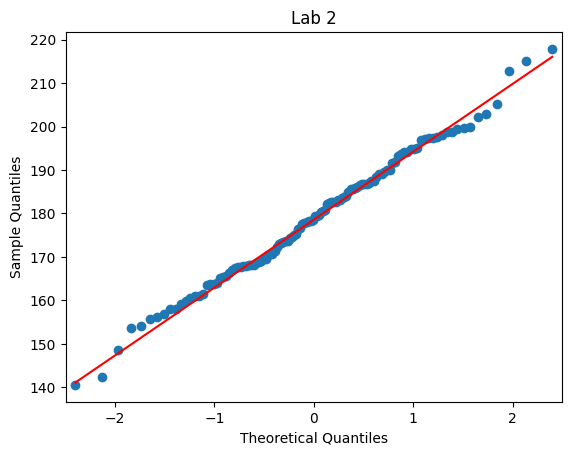

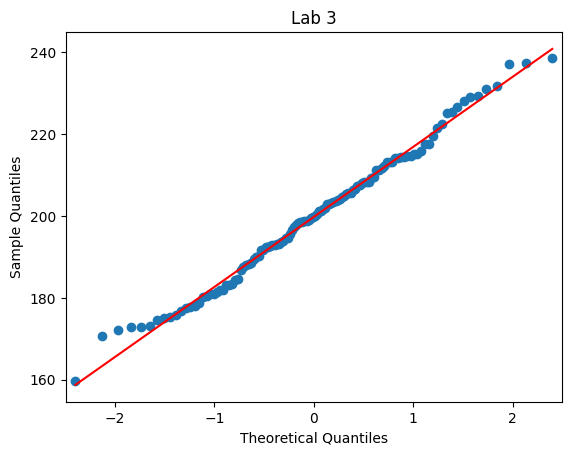

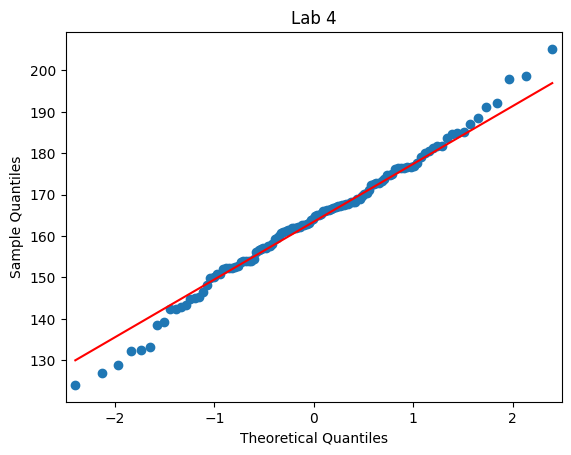

In [25]:


sm.qqplot(labtat['Laboratory 1'],line='q')
plt.title('LAb 1 ')

sm.qqplot(labtat['Laboratory 2'],line='q')
plt.title('Lab 2')

sm.qqplot(labtat['Laboratory 3'],line='q')
plt.title('Lab 3')

sm.qqplot(labtat['Laboratory 4'],line='q')
plt.title('Lab 4')
plt.show()

In [29]:
test_statistic , p_value = stats.f_oneway(labtat.iloc[:,0],labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])
print('p_values is ',p_value)

p_values is  2.1156708949992414e-57


In [ ]:
# If p_value is  ≠  ' α  ' we failed to reject Null Hypothesis because of lack of evidence
# If p_value is = ' α  ' we reject Null Hypothesis

In [33]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


**Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the **

# **Ques 3**

In [34]:
buyer=pd.read_csv('/content/BuyerRatio.csv')

In [36]:
buyer


,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [ ]:
buyer.describe()

In [ ]:
buyer.isnull().sum()

In [ ]:
buyer.info()

In [40]:
table = [[50,142,131,70],
        [435,1523,1356,750]]


In [46]:
stat, p, dof, exp = stats.chi2_contingency(table)
print(stat,"\n", p,"\n", dof,"\n", exp)


1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [47]:
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [48]:
observed=np.array([50,142,131,70,435,1523,1356,750])
expected=np.array([42.76531299,146.81287862,131.11756787,72.30424052,442.23468701,1518.18712138,1355.88243213,747.69575948])

In [49]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


In [54]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha :
    print("we failed to Reject null hypothesis")
else:
    print("we reject null hypothesis and accept Alternative hypothesis ")



Significnace=0.050, p=0.810
we reject null hypothesis and accept Alternative hypothesis 


# ***We fail to reject Null Hypothesis because of lack evidence. Therefore, there is no dependency between male-female buyers rations and are similar across regions. Hence, Independent ***

## **Que 4**

In [4]:
center=pd.read_csv('/content/Costomer+OrderForm.csv')

In [5]:
center.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [6]:
center.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [7]:
center[center.isnull().any(axis=1)]


,Phillippines,Indonesia,Malta,India


In [8]:
center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [9]:
print(center['Phillippines'].value_counts(),'\n',center['Indonesia'].value_counts(),'\n',center['Malta'].value_counts(),'\n',center['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [10]:
contigency_tbl=[[271,267,269,280],
                [29,33,31,20]]
contigency_tbl

[[271, 267, 269, 280], [29, 33, 31, 20]]

In [11]:
stat,p,df,exp = stats.chi2_contingency(contigency_tbl)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [13]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [14]:
test_statistic, p_value =stats.chisquare(observed,expected,ddof=df)
print('statistic=',test_statistic,'\n','p_value=',p_value)

statistic= 3.858960685820355 
 p_value= 0.4254298144535761


In [15]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis ')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis


## **We fail to reject Null Hypothesis because of lack of evidence**